In [12]:
import json
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
# Read in the county boundaries file
counties = gpd.read_file('/Users/amatutuwaaosei-akoto/Desktop/choropleth_maps/PaCounty2023_04.geojson')
print(counties.head())

  SOUND  MSLINK MAINT_CTY_  AREA  COUNTY_PER  COUNTY_N_1 NOTE_FILE IMAGE_NAME  \
0   NaN      38          8   0.0         0.0          38       NaN   poll.bmp   
1   NaN      10          2   0.0         0.0          10       NaN   poll.bmp   
2   NaN      11          3   0.0         0.0          11       NaN  crane.bmp   
3   NaN      12          4   0.0         0.0          12       NaN   poll.bmp   
4   NaN      13          2   0.0         0.0          13       NaN   poll.bmp   

   LEN  NUMERIC_LA  ...  PA_CTY_COD     Shape_Leng COUNTY_NAM  DISTRICT_O  \
0  0.0         5.0  ...          38  167992.071439    LEBANON         8-8   
1  0.0         3.0  ...          10  238571.252734     BUTLER        10-2   
2  0.0         1.0  ...          11  260475.907460    CAMBRIA         9-3   
3  0.0         2.0  ...          12  193672.838921    CAMERON         2-4   
4  0.0         2.0  ...          13  206991.702809     CARBON         5-2   

  DISTRICT_N SPREAD_SHE COUNTY_NUM FIPS_COUNT COUN

In [29]:
merged['count'] = pd.to_numeric(merged['count'])

In [30]:
# Read in the overdose deaths file
overdose_deaths = gpd.read_file('/Users/amatutuwaaosei-akoto/Desktop/choropleth_maps/Estimated Drug Overdose Deaths CY 2012-Current County Health.geojson')
print(overdose_deaths.head())

  count county_fips county_code_text   year     longitude        county  \
0  3119           0                0   2015    -75.167756  Pennsylvania   
1  4540           0                0   2016    -75.167756  Pennsylvania   
2     0         105               53   2013  -77.89879229        Potter   
3     0          67               34  2021*    -77.405775       Juniata   
4   289           3                2   2013  -79.98619843     Allegheny   

       estimate_description state_fips_code county_code_number  \
0  Any Drug Overdose Deaths              42                  0   
1  Any Drug Overdose Deaths              42                  0   
2  Any Drug Overdose Deaths              42                 53   
3  Any Drug Overdose Deaths              42                 34   
4  Any Drug Overdose Deaths              42                  2   

  latitude_longitude                            suppression_information  \
0          39.346129                                                NaN   
1 

In [31]:
# Extract the 'County Code Number' and 'Count' columns
overdose_deaths = overdose_deaths[['county_code_number', 'count']]

In [32]:
# Merge the overdose deaths data with the county boundaries data based on the 'County Code Number'
merged = counties.merge(overdose_deaths, left_on='COUNTY_NUM', right_on='county_code_number')
print(merged.columns)

Index(['SOUND', 'MSLINK', 'MAINT_CTY_', 'AREA', 'COUNTY_PER', 'COUNTY_N_1',
       'NOTE_FILE', 'IMAGE_NAME', 'LEN', 'NUMERIC_LA', 'AREA_SQ_MI', 'GPID',
       'PA_CTY_COD', 'Shape_Leng', 'COUNTY_NAM', 'DISTRICT_O', 'DISTRICT_N',
       'SPREAD_SHE', 'COUNTY_NUM', 'FIPS_COUNT', 'COUNTY_ARE', 'geometry',
       'county_code_number', 'count'],
      dtype='object')


In [35]:
merged['count'] = merged['count'].fillna(0).astype(int)

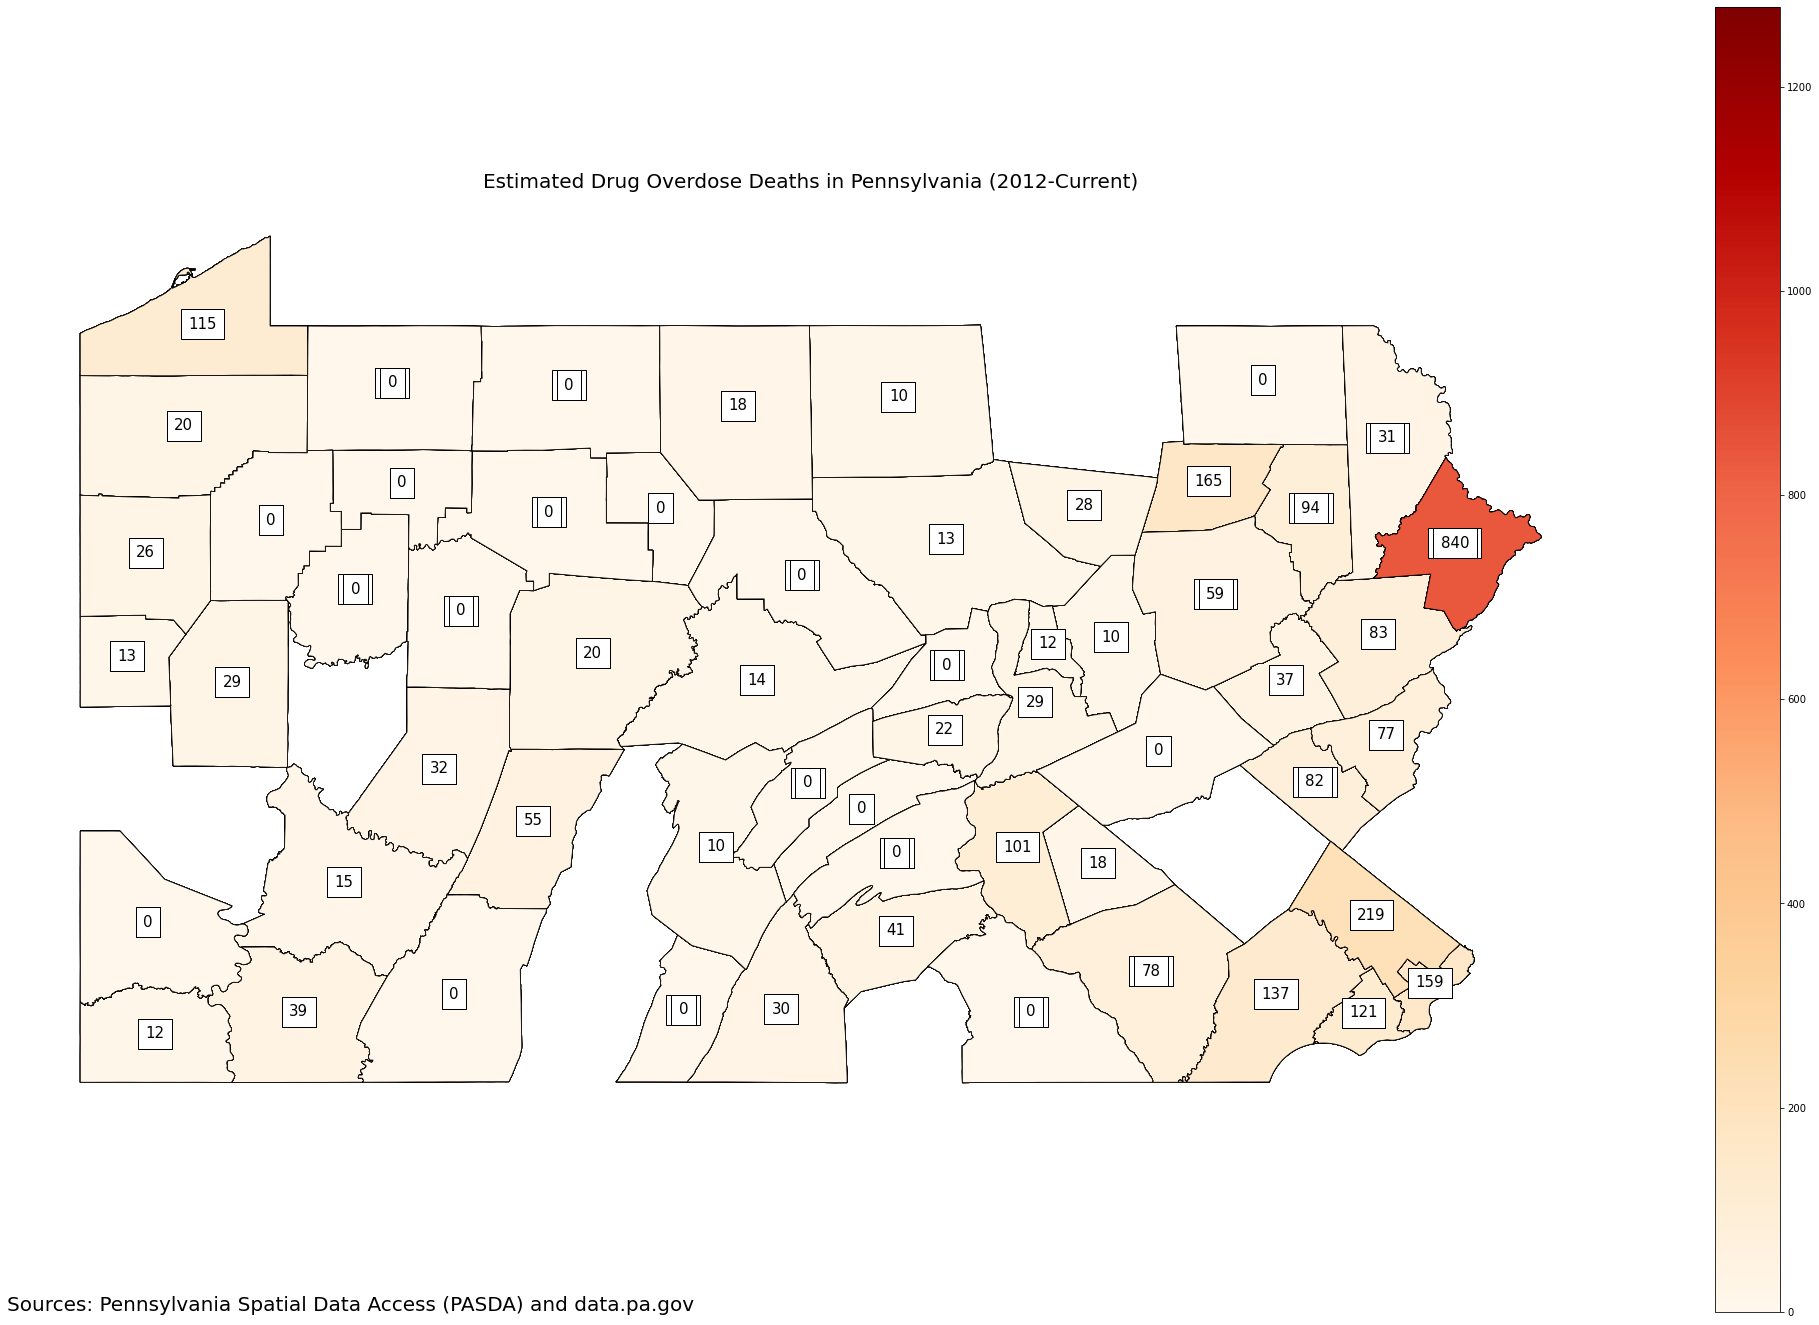

In [57]:
# Create figure and axes
fig, ax = plt.subplots(figsize=(36,24))

# Plot the map with annotations
merged.plot(column='count', cmap='OrRd', linewidth=0.8, edgecolor='black', ax=ax, legend=True)

# Add annotations for each county
for idx, row in merged.iterrows():
    plt.annotate(text=int(row['count']), xy=row['geometry'].centroid.coords[0], ha='center', fontsize=15, 
                 textcoords="offset points", xytext=(0,0), bbox=dict(boxstyle="square,pad=0.5", fc="white", ec="black"))

ax.axis('off')
ax.set_title('Estimated Drug Overdose Deaths in Pennsylvania (2012-Current)', fontsize=20)

plt.text(0, -0.2, 'Sources: Pennsylvania Spatial Data Access (PASDA) and data.pa.gov', transform=ax.transAxes, fontsize=20)

plt.show()